# Solution to Exercises

## OLS Linear Regression

Intercept is  [98.71284906]
Slope is  [[-0.99515441]]
R^2 for OLS is  0.9996943205528053


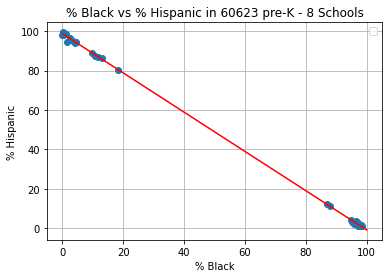

In [14]:
import pandas as pd
import numpy as np
raw_CPS_data=  pd.read_json('https://data.cityofchicago.org/resource/kh4r-387c.json?$limit=100000')
raw_CPS_data.head() 
df=raw_CPS_data[['address','student_count_total','student_count_black','student_count_hispanic','student_count_white','zip']]
df23=df[df['zip']==60623]
df23=df23.reset_index(drop=True)
df23.columns= ["address","total","black","hispanic","white","zip"]
for i in df23.index:
    df23.loc[i,'%black']=round(100*df23.loc[i,'black']/df23.loc[i,'total'],1)
    df23.loc[i,'%hispanic']=round(100*df23.loc[i,'hispanic']/df23.loc[i,'total'],1)
    df23.loc[i,'%white']=round(df23.loc[i,'white']/df23.loc[i,'total'],1)
from sklearn.linear_model import LinearRegression #sklearn is a machine learning library
X=df23[["%black"]]
Y=df23[["%hispanic"]]
reg=LinearRegression()
reg.fit(X,Y)
print("Intercept is ", reg.intercept_)
print("Slope is ", reg.coef_)
print("R^2 for OLS is ", reg.score(X,Y))
# x values on the regression line will be between 0 and 100 with a spacing of .0
x = np.arange(0, 100 ,.01) 
# define the regression line y = mx+b here
[[m]]=reg.coef_
[b]=reg.intercept_
y =  m*x  + b   

fig=df23.plot(x='%black', y='%hispanic', style='o')  
plt.title('% Black vs % Hispanic in 60623 pre-K - 8 Schools')  
plt.xlabel('% Black')  
plt.ylabel('% Hispanic')  
# plot the regression line 
plt.plot(x,y, 'r') #add the color for red
plt.legend([],[], frameon=True)
plt.grid()
plt.show()

The graph show that schools are predominantly hispanic or preominantly black.

## K-means clustering

Problem 1) $\mathbf{w}_1=(-4,-1.2)$,  $\mathbf{w}_2=(-3.2,-0.72)$ and  $\mathbf{w}_3=(-2.56,-0.432)$. The gradient descent sequence will converge to the minimum point at $(0,0)$. To prove this, note that if we let $\mathbf{w}_n=(x_n,y_n)$, then $\mathbf{w}_n=\mathbf{w}_{n-1}-0.1\nabla \mathbf{w}_{n-1}$ implies that
$x_n=0.8x_{n-1}$ and $y_n=0.6y_{n-1}$. It follows that $\lim_{n\rightarrow \infty} x_n=\lim_{n\rightarrow \infty} y_n=0.$

Problem 2) 

i)Fix the prototypes $z_1=(-1,0)$ and $z_2=(1,0)$. Then we have $y_{1,1}=1$, $y_{1,2}=0$, $y_{2,1}=1$, $y_{2,2}=0$, $y_{3,1}=1$, $y_{3,2}=0$,
    $y_{4,1}=0$, $y_{4,2}=1$, $y_{5,1}=0$, $y_{5,2}=1$, $y_{6,1}=0$, $y_{6,2}=1$.
    
ii) Fix each of these assignments, then the prototypes are unchanged: $\mathbf{z}_1=(-1,0)$, $\mathbf{z}_2=(1,0)$.

iii) Fix the prototypes  and the assignments are as before.


Thus, the points  $(-1,-1)$, $(-1,0)$, $(-1,1)$ are assigned to cluster 1, and the points $(1,-1)$, $(1,0)$, and $(1,1)$ to cluster 2.


Problem 3)

i) Fix the prototypes $z_1=(-1,0)$ and $z_2=(1,0)$. Then we have $y_{1,1}=1$, $y_{1,2}=0$, $y_{2,1}=1$, $y_{2,2}=0$, $y_{3,1}=1$, $y_{3,2}=0$,
    $y_{4,1}=0$, $y_{4,2}=1$, $y_{5,1}=0$, $y_{5,2}=1$, $y_{6,1}=0$, $y_{6,2}=1$.
    
ii) Fix each of these assignments, then the prototypes are unchanged: $\mathbf{z}_1=(-1,0)$, $\mathbf{z}_2=(1,0)$.

iii) Fix the prototypes  and the assignments are as before.


Thus, the points  $(-1,-1)$, $(-1,0)$, $(-1,1)$ are assigned to cluster 1, and the points $(1,-1)$, $(1,0)$, and $(1,1)$ to cluster 2.




Problem 4) 

<img src="fig20.png" width="200px"> 


**Lab Assignment**

Let's take a look at the 22 clusters.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
import json # library to handle JSON files
import requests # library to handle requests
import folium
# read from excel file, dropping all entries with N/A values
violence = pd.read_csv('Violence.csv').dropna(subset = ['LATITUDE', 'LONGITUDE'])

# Streamline columns to just latitude and longitude, reduce to just first 1000 entries
violence = violence[['LATITUDE', 'LONGITUDE']].head(1000)

# Reset the index for consistent numbering
violence = violence.reset_index(drop = True)
print("Size of Dataset", violence.shape)
# Get the 100 colors used to identify clusters
colorlist = list(mcolors.XKCD_COLORS.values())[:100]

# Make a map that uses k-means clustering to divide locations into up to 100 clusters 
#the inout variable (clusters) specifies the number of clusters. 
#the input variable data specifies the locations.
def make_map(clusters,data):
    assert clusters >= 1, "Number of clusters must be at least 1"
    assert clusters <= len(colorlist), "Number of clusters exceeds maximum amount"
    x=data[['LATITUDE', 'LONGITUDE']]
    k_means = KMeans(n_clusters=clusters)
    k_means.fit(x)
    k_means_labels = k_means.labels_
    
    x['labels'] = k_means_labels
    k_map = folium.Map(location=[41.783, -87.621],  tiles="Stamen Toner", zoom_start=10)

    for i in np.arange(0,len(x),1):  #add parcel data one
        p=[x.loc[i,"LATITUDE"],x.loc[i,"LONGITUDE"]]# by one to the base map.
        k_map.add_child(folium.CircleMarker(p, radius=1,color=colorlist[x.loc[i, 'labels']], fill = True, fill_opacity = 1))
    return   k_map

cluster22_map = make_map(22,violence)
cluster22_map


Size of Dataset (1000, 2)


Here is a map of the districts.

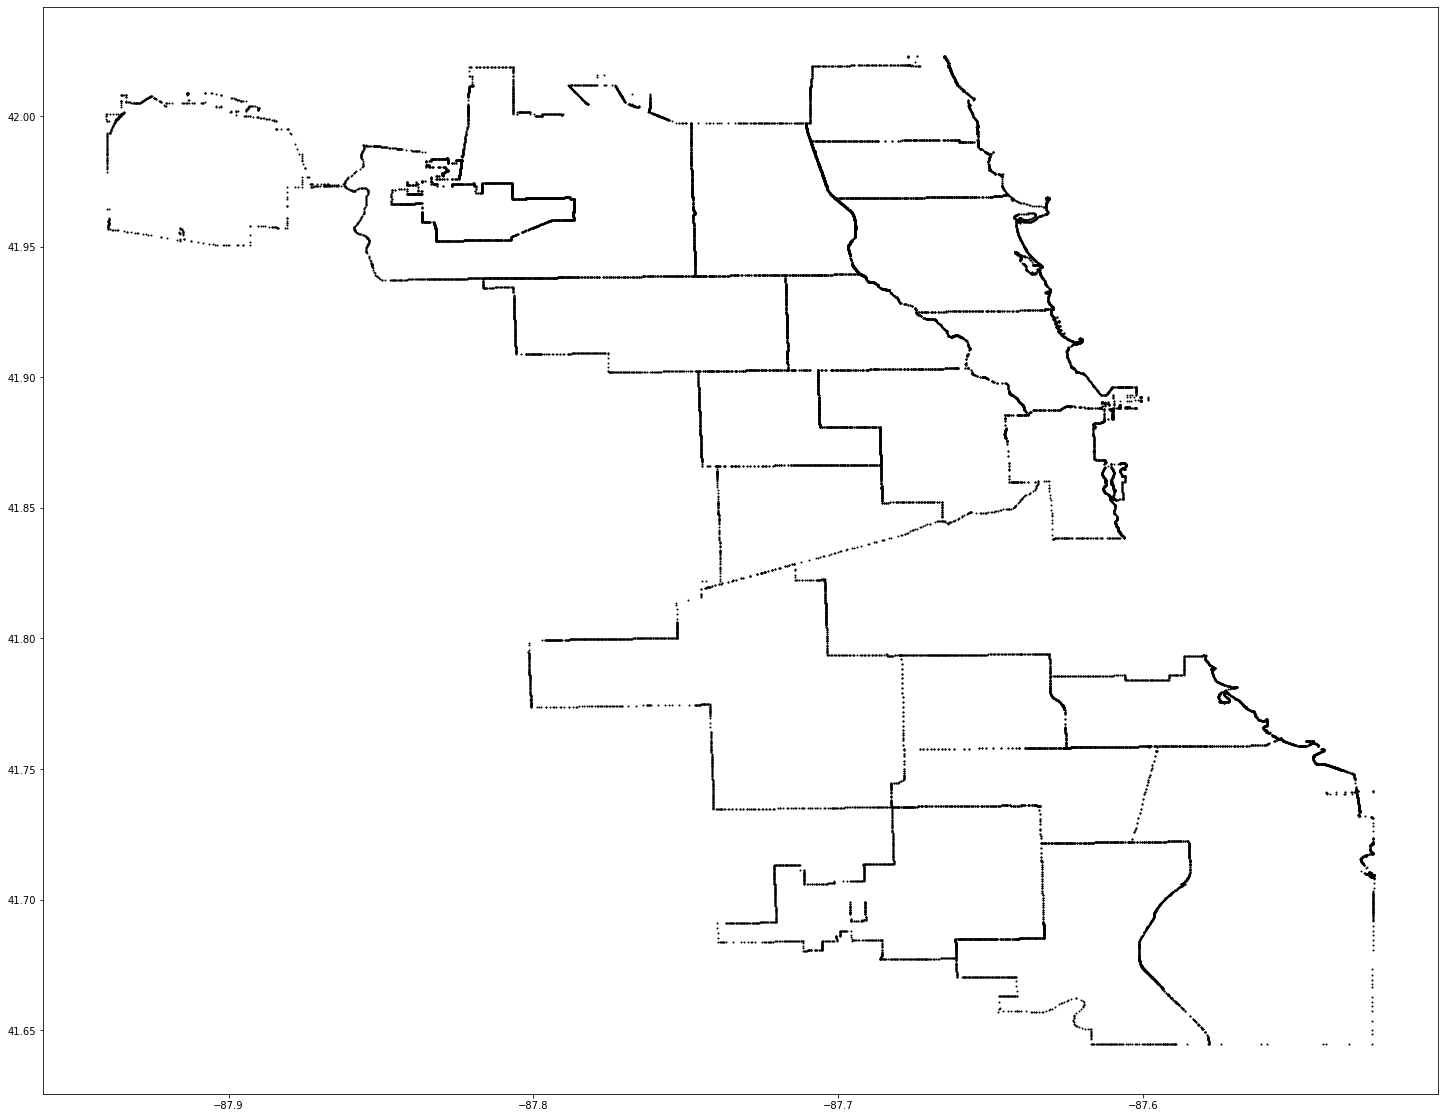

In [8]:
with open('CPDdistricts.geojson') as json_data:
    district_data = json.load(json_data)
districts=district_data['features']
#initialize the plot dimensions
fig=plt.figure(figsize=(25,20))
#create a plot axis
ax=fig.add_subplot(1,1,1)
#add the beat boundaries
ind=0
while (ind<22):
    for coordlist in districts[ind]['geometry']['coordinates']:
        data=np.array(coordlist,dtype=object)
        flat=[]
        for i in data:
            for j in i:
                flat.append(j)
        x,y=np.array(flat).T
        ax.plot(x,y,'o',markerfacecolor='k',markeredgecolor='k',markersize=1)
        ind+=1

Let's add the Cluster number to each location.

In [9]:
k_means = KMeans(n_clusters=22)
k_means.fit(violence)
k_means_labels = k_means.labels_
violence["Cluster"] = k_means_labels
violence.head()

,LATITUDE,LONGITUDE,Cluster
0,41.865451,-87.725050,11
1,41.874440,-87.717590,9
2,41.923618,-87.803495,16
3,41.800621,-87.663270,5
4,41.865637,-87.720071,11


Now we can add the cluster numbers to the district boundary map.

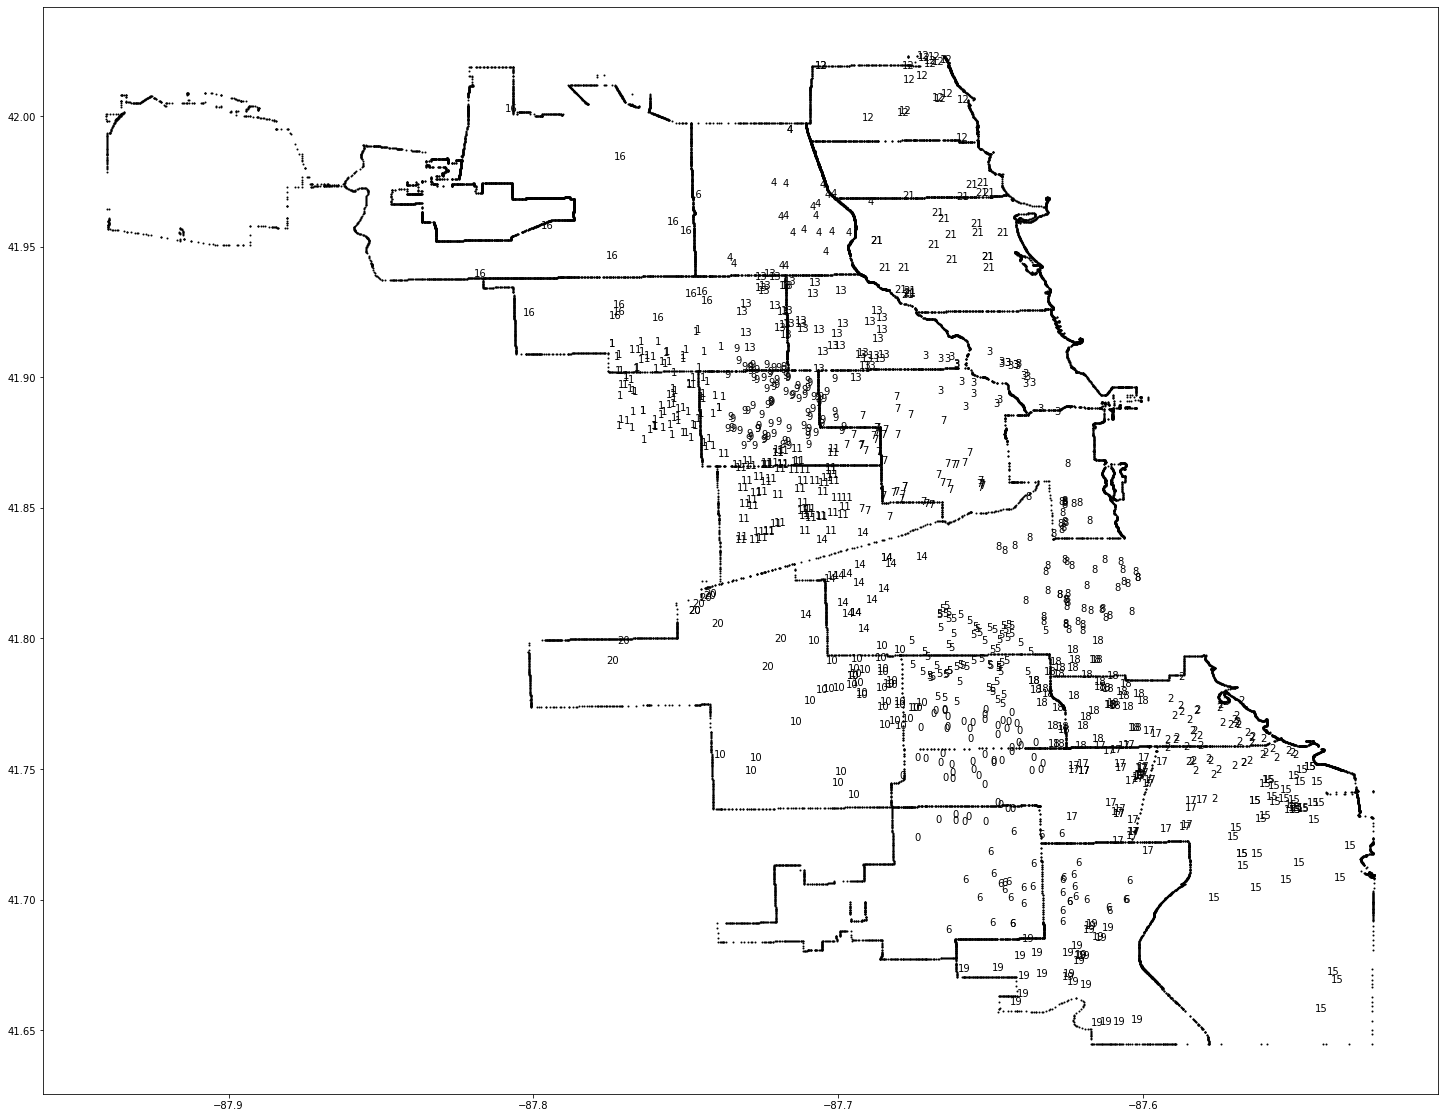

In [10]:
fig=plt.figure(figsize=(25,20))
#create a plot axis
ax=fig.add_subplot(1,1,1)
#add the clusters

for i in violence.index:
    plt.text(violence.loc[i,"LONGITUDE"],violence.loc[i,"LATITUDE"],str(violence.loc[i,"Cluster"]))


#add the beat boundaries
ind=0
while (ind<22):
    for coordlist in districts[ind]['geometry']['coordinates']:
        data=np.array(coordlist,dtype=object)
        flat=[]
        for i in data:
            for j in i:
                flat.append(j)
        x,y=np.array(flat).T
        ax.plot(x,y,'o',markerfacecolor='k',markeredgecolor='k',markersize=1)
        ind+=1

While it is not perfect, our k-means algorithm clustered the violent occurrences in a similar manner to the police district boundaries.

## Dimension Reduction by PCA

1)$\,$ a)

The data matrix is

\begin{align*}
\mathbf{X}=
\begin{pmatrix}
   -1 & 3\\
0& 0 \\
1&-3
\end{pmatrix}.
 \end{align*}
 The covariance matrix is
 \begin{align*}
\mathbf{V}=\frac{1}{3}
\begin{pmatrix}
   2 & -6 \\
-6 & 18\\
\end{pmatrix}= 
 \begin{pmatrix}
   2/3 & -2 \\
-2 & 6\\
\end{pmatrix}
  \end{align*}
Thus, $Var(\mathbf{x})=2/3$, $Var(\mathbf{y})=6$, and $Cov(\mathbf{x},\mathbf{y})=-2.$

b) $\,$The eigenvalues are 0 and 10. The principal component is determined by the largest eigenvalue $\lambda=10$, which has eigenvector $(1,-3).$ This vector determines the line $y=-3x,$ which is the desired line.

2) $\,$a)


\begin{align*}
\scriptsize
\mathbf{A}=
\begin{pmatrix}
 2 & 2 & 0 \\
 2 & 2 & 0 \\
 0 & 0 &  1/2
\end{pmatrix}.
\end{align*}

b)

The eigenvalues of $\mathbf{A}$ are $\lambda_1=4$, $\lambda_2=1/2$, $\lambda_3=0$, with corresponding unit eigenvectors for  $\mathbf{v}_1=(1/\sqrt{2},1/\sqrt{2},0)^T$, $\mathbf{v}_2=(0,0,1)^T$, and $\mathbf{v}_3=(1/\sqrt{2},-1/\sqrt{2},0)^T$

The first principal component of $\mathbf{X}$ is given by $\lambda_1,\mathbf{v}_1$, the second principal component of  is given by $\lambda_2,\mathbf{v}_2$, and  the third principal component  is given by $\lambda_3,\mathbf{v}_3$. 

c)

The variance of the data along the line through the origin determined by $\mathbf{v}_1$ is the maximum among all lines through the origin.

The total variance of the data (sum of squared distances to the origin) is the sum of the variances by projecting the data onto the three lines through the origin determined by the mutually orthogonal unit vectors $\mathbf{v}_1$,  $\mathbf{v}_2$, and  $\mathbf{v}_3$.

The variances along each of these lines decreases. Each captures more of the variance in an optimal way. The first principal component captures the most amount of variance projecting the data onto a line through the origin (1D subspace). This line is determined by $\mathbf{v}_1$. The first two principal components capture the most variance if the data is projected onto a plane through the origin (2D subspace): the plane is determined by the vectors $\mathbf{v}_1$ and $\mathbf{v}_2$.

3)

a) $\,$ By inspection, the greatest variance occurs in the $y$-coordinate, so we expect the first principal component to be in the direction of the line determined by $(0,1,0)$. In the orthogonal direction (i.e., the $xz$-plane), we see that the data lie on the line $x=2z$. Thus, we  expect the second principal component to be in the direction of the line determined by $(2,0,1)/\sqrt{5}$.

b) $\,$ 

$$
\mathbf{A}=
\begin{pmatrix}
 2 & 0 & 1 \\
 0 & 8 &  0 \\
 1 & 0 &  1/2
\end{pmatrix}.
$$

The first principal component is given by $\lambda_1=8$ with eigenvector $(0,1,0)$.

The second principal component is given by eigenvector $\lambda_2=5/2$ with eigenvector $(2,0,1)/\sqrt{5}$.

4) $\,$ a) $\,$ The line along which the projected points have the greatest variance.

b) $\,$ There is a difference in the ouliers--of significance in considering the most vulnerable.


5)

a) $\,$ The original image is represented by a vector in $\mathbf{R}^{32^2}=\mathbf{R}^{1024}$ where each pixel value corresponds to a coefficient in the standard basis.  The PCA image can be represented using  just 2 coefficients corresponding to the first two PCA basis vectors.

b)  If we used the standard basis, we would get the grayscale values for 
two of the $64^2$ pixels, and the rest of the pixels would have a value of 0 (i.e., appear as pure black.) There would be no way to distinguish whether the letter is an 'a' or 'b' using just two coordinates in the standard basis.


4) Let's use make_map() to divide the locations into two parts.

In [5]:
make_map(2,violence)

## Binary Classification by SVM

1)$\,$ a) $\,$ The hyperplane is the line $x_1+2x_2=1$

b) $\,$  The two half-spaces are the half-plane  $\pi^+: x_1+2x_2>1$ and the half-plane $\pi^-: x_1+2x_2<1.$

2) 
a) $\,$ For any $k\neq 0$, we have$ \mathbf{w}\cdot\mathbf{x}+b=0$ if and only if $ k(\mathbf{w}\cdot\mathbf{x}+b)=0$ if and only if $ k\mathbf{w}\cdot\mathbf{x}+kb=0$ 

b) $\,$  The signed distance formula is $\rho(\mathbf{x},\pi)=\frac{\mathbf{w}\cdot\mathbf{x}+b}{\|\mathbf{w}\|}$. Since $\mathbf{w}\cdot\mathbf{0}=0,$ the signed distance is $\mathbf{\rho}(\mathbf{0},\mathbf{\pi})= \frac{b}{\|\mathbf{w}\|}$.

c) $\,$ As in the right panel of {\bf Figure~\ref{svm4}}, 
there are infinitely many parallel separating hyperplanes with the same margin filling in the space between support vectors. The SVM hyperplane is the one that is equidistant from the two classes $C_1,C_2.$ 

d) $\,$ The SVM $L_2$ loss function simplifies to $J=\frac{\lambda}{2}\|\mathbf{w}\|^2$ ($\lambda>0$), which if minimized will then maximize the margin $\frac{2}{\|\mathbf{w}\|}$.

3) See the JNB Support Vector Machines.